<a href="https://colab.research.google.com/github/dango80/Models_examples/blob/main/GaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Download and Read Data**


In [ ]:
data=pd.read_csv("/content/pima-indians-diabetes (1).csv")
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.shape

(768, 9)

**EDA**

In [ ]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Detecting missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isna().mean()

Preg     0.0
Plas     0.0
Pres     0.0
skin     0.0
test     0.0
mass     0.0
pedi     0.0
age      0.0
class    0.0
dtype: float64

There are no missing values but for certain variables the value 0 should be irrealistic we will threat it as a missing

In [ ]:
from numpy import nan

In [ ]:
data.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [ ]:
data["Plas"]=data["Plas"].replace(0,np.nan)
data["Pres"]=data["Pres"].replace(0,np.nan)
data["skin"]=data["skin"].replace(0,np.nan)
data["test"]=data["test"].replace(0,np.nan)
data["mass"]=data["mass"].replace(0,np.nan)
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's see now the real missings

In [ ]:
data.isnull().sum()

Preg       0
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [ ]:
data.isnull().mean()

Preg     0.000000
Plas     0.006510
Pres     0.045573
skin     0.295573
test     0.486979
mass     0.014323
pedi     0.000000
age      0.000000
class    0.000000
dtype: float64

we will replace it with the median because the it's more robust to the outliers respect to the mean

In [ ]:
data.median()

Preg       3.0000
Plas     117.0000
Pres      72.0000
skin      29.0000
test     125.0000
mass      32.3000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

In [ ]:
data.fillna(data.median(),inplace=True)

In [ ]:
data.isnull().mean()

Preg     0.0
Plas     0.0
Pres     0.0
skin     0.0
test     0.0
mass     0.0
pedi     0.0
age      0.0
class    0.0
dtype: float64

Finding the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

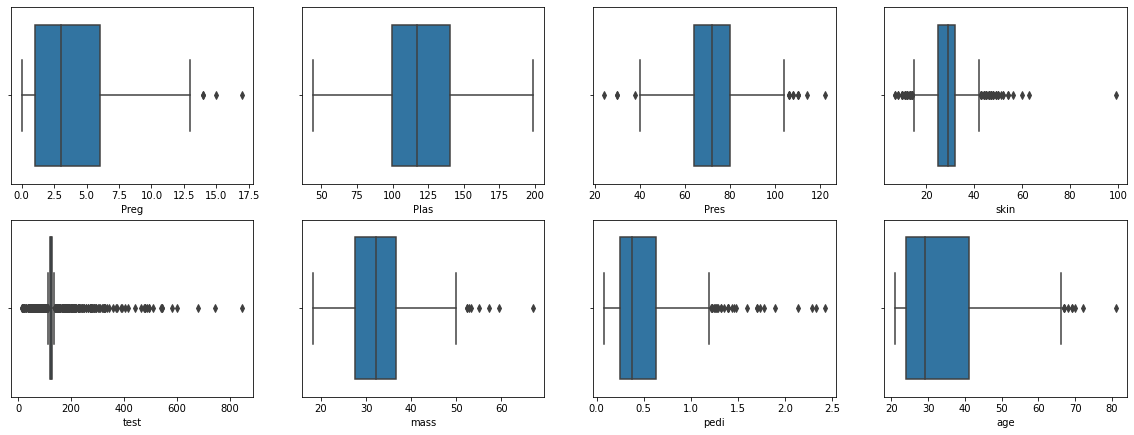

In [ ]:
# Outlier detection using boxplots 
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Preg'])

plt.subplot(4,4,2)
sns.boxplot(data['Plas'])

plt.subplot(4,4,3)
sns.boxplot(data['Pres'])

plt.subplot(4,4,4)
sns.boxplot(data['skin'])

plt.subplot(4,4,5)
sns.boxplot(data['test'])

plt.subplot(4,4,6)
sns.boxplot(data['mass'])

plt.subplot(4,4,7)
sns.boxplot(data['pedi'])

plt.subplot(4,4,8)
sns.boxplot(data['age'])

In [ ]:
data['Preg']=data['Preg'].clip(lower=data['Preg'].quantile(0.05), upper=data['Preg'].quantile(0.95))
data['Pres']=data['Pres'].clip(lower=data['Pres'].quantile(0.05), upper=data['Pres'].quantile(0.95))
data['skin']=data['skin'].clip(lower=data['skin'].quantile(0.05), upper=data['skin'].quantile(0.95))
data['test']=data['test'].clip(lower=data['test'].quantile(0.05), upper=data['test'].quantile(0.95))
data['mass']=data['mass'].clip(lower=data['mass'].quantile(0.05), upper=data['mass'].quantile(0.95))
data['pedi']=data['pedi'].clip(lower=data['pedi'].quantile(0.05), upper=data['pedi'].quantile(0.95))
data['age']=data['age'].clip(lower=data['age'].quantile(0.05), upper=data['age'].quantile(0.95))
 

Substitute the outliers with the quantiles of the distributions(0.05 % 0.95)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

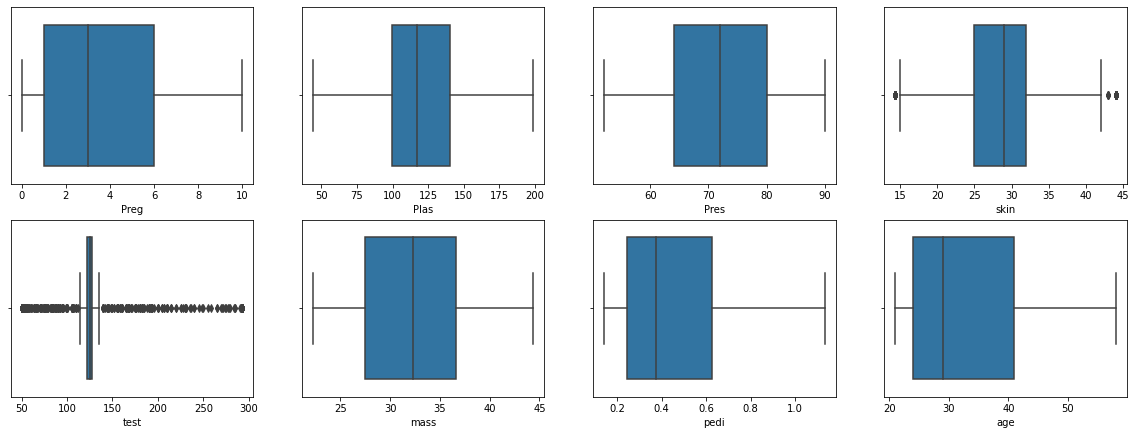

In [ ]:
# Lets visualise the boxplots after imputing the outliers 
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Preg'])

plt.subplot(4,4,2)
sns.boxplot(data['Plas'])

plt.subplot(4,4,3)
sns.boxplot(data['Pres'])

plt.subplot(4,4,4)
sns.boxplot(data['skin'])

plt.subplot(4,4,5)
sns.boxplot(data['test'])

plt.subplot(4,4,6)
sns.boxplot(data['mass'])

plt.subplot(4,4,7)
sns.boxplot(data['pedi'])

plt.subplot(4,4,8)
sns.boxplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


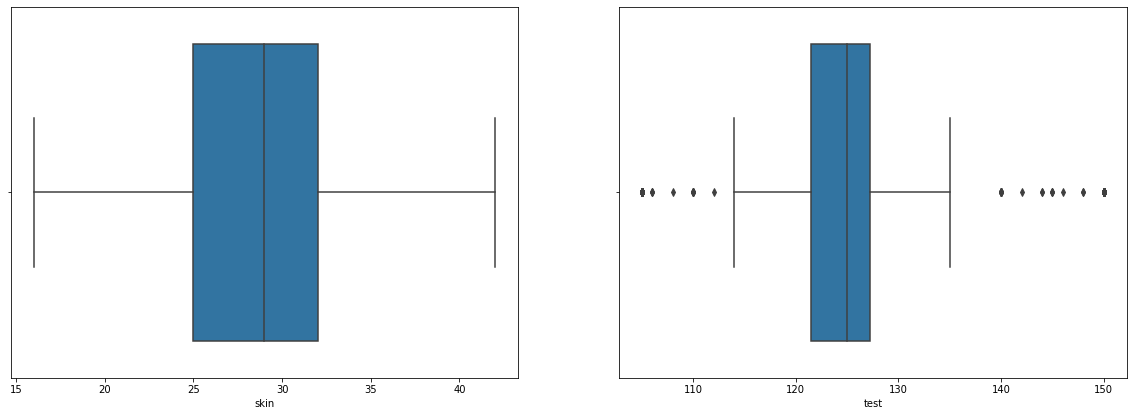

In [ ]:
# As we can see, there are still outliers in columns Skin Thickness and Insulin. Lets try manipulating the percentile values.
data['skin']=data['skin'].clip(lower=data['skin'].quantile(0.07), upper=data['skin'].quantile(0.93))
data['test']=data['test'].clip(lower=data['test'].quantile(0.21), upper=data['test'].quantile(0.80))
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
sns.boxplot(data['skin'])
plt.subplot(2,2,2)
sns.boxplot(data['test'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


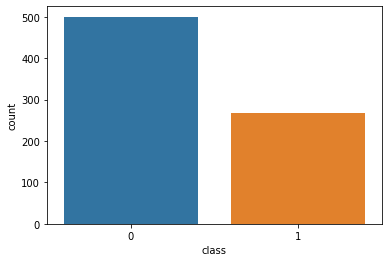

In [ ]:
sns.countplot(data["class"])

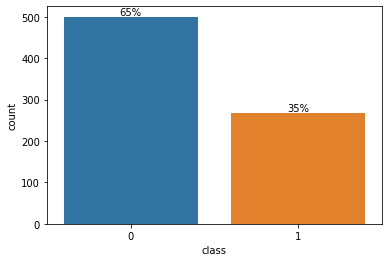

In [ ]:
total=float(len(data))
ax = sns.countplot(x="class", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 

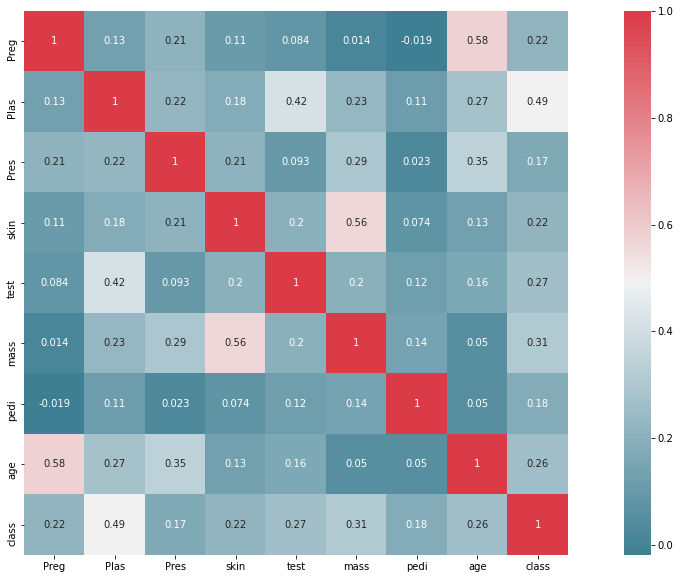

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

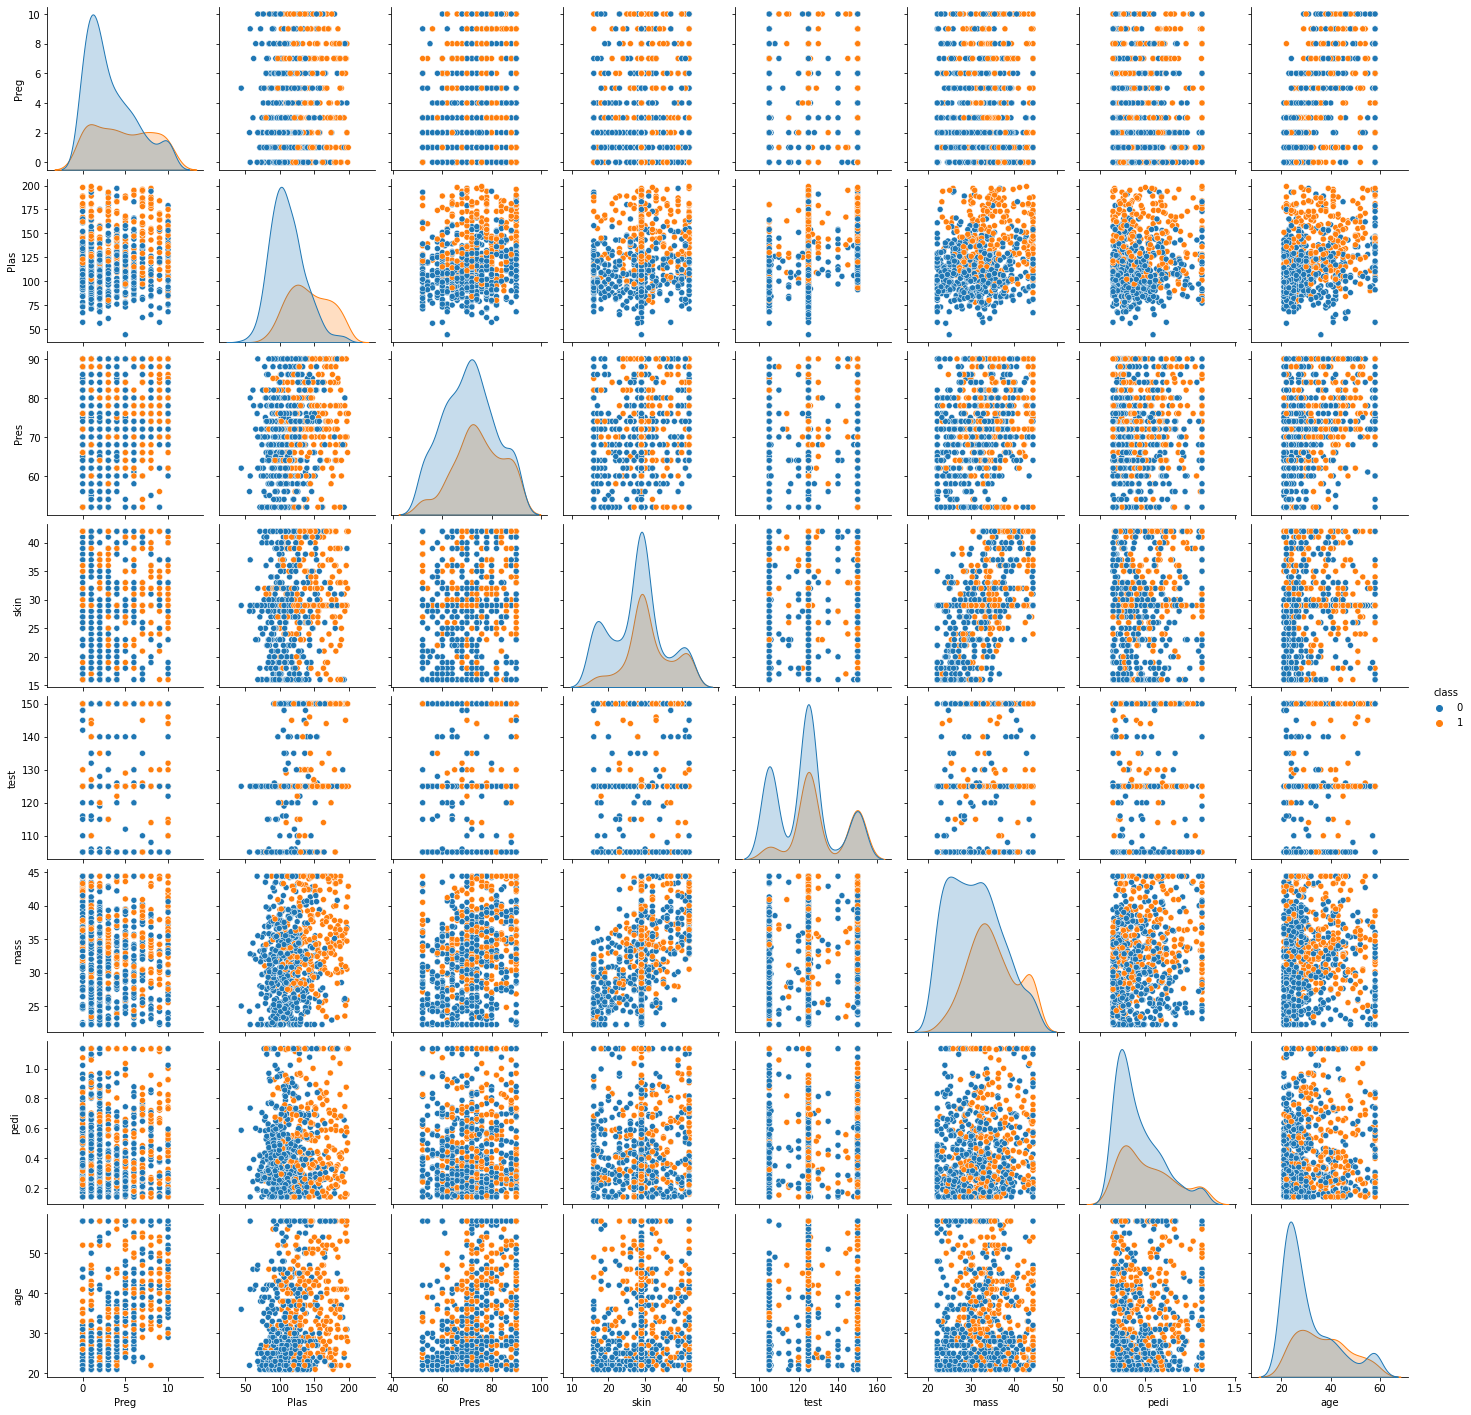

In [ ]:
# Pair plot analysis 
sns.pairplot(data,hue='class',diag_kind='kde')

In [ ]:
data.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x= data.drop(['class'],axis =1)
y=data['class']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
model.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predicted= model.predict(xTest)

In [ ]:
predicted

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, predicted))

Accuracy: 0.7987012987012987
